In [1]:
%matplotlib inline
import matplotlib.pyplot
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
df=pd.read_csv('Ravdess_TRAIN_transformed.csv')

## Classification

In [3]:
X, y = df.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex"], axis=1), df[["sex"]].values.flatten()
#X = X.iloc[:, :30]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### RandomForest

In [4]:
clf = clf = RandomForestClassifier(random_state=0, n_jobs=-1,
                                     n_estimators=200, 
                                     criterion='gini', 
                                     max_depth=16, 
                                     min_samples_split=2, 
                                     min_samples_leaf=2)

In [5]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
prob = clf.predict_proba(X_test)

In [6]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9808743169398907
F1-score [0.98028169 0.98143236]
              precision    recall  f1-score   support

           F       0.98      0.98      0.98       177
           M       0.98      0.98      0.98       189

    accuracy                           0.98       366
   macro avg       0.98      0.98      0.98       366
weighted avg       0.98      0.98      0.98       366



### NeuralNetwork

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier

#mlp = MLPClassifier(activation='tanh', alpha=5, batch_size=70, early_stopping=True, hidden_layer_sizes=(64), learning_rate='constant',  solver='sgd', validation_fraction=0.2, random_state=42)
mlp = MLPClassifier(solver='sgd', validation_fraction=0.35, early_stopping=True)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9344262295081968
F1-score [0.93370166 0.93513514]
              precision    recall  f1-score   support

           F       0.91      0.95      0.93       177
           M       0.96      0.92      0.94       189

    accuracy                           0.93       366
   macro avg       0.93      0.94      0.93       366
weighted avg       0.94      0.93      0.93       366



## Global Explanation

In [8]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook

In [9]:
feature_names = X_train.columns.tolist()
target_name = ['sex']

## Feature importance of NN

In [10]:
interpreter_nn = Interpretation(
        training_data = X_train, training_labels = y_train, feature_names = feature_names
    )
pyint_model_nn = InMemoryModel(
            mlp.predict_proba,
            examples = X_train,
            target_names = target_name,
            unique_values = np.unique(y_train).tolist(),
            feature_names = feature_names,
        )

2023-07-09 11:49:09,418 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2023-07-09 11:49:13,965 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[242/242] features ████████████████████ Time elapsed: 142 seconds

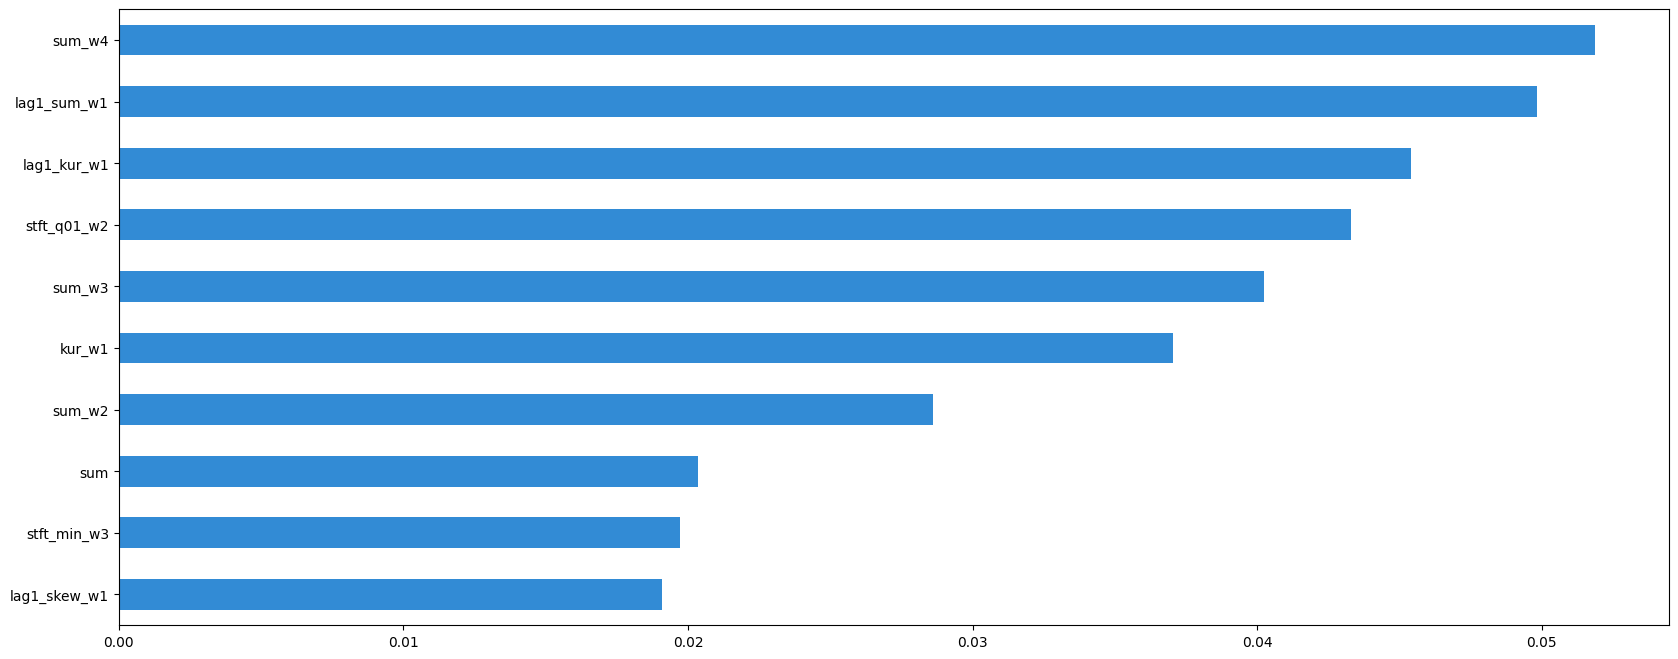

In [103]:
plots1, ax1 = interpreter_nn.feature_importance.plot_feature_importance(pyint_model_nn, ascending=True, progressbar=True,
                                n_jobs=-1, n_features=10, method='model-scoring', scorer_type='default')

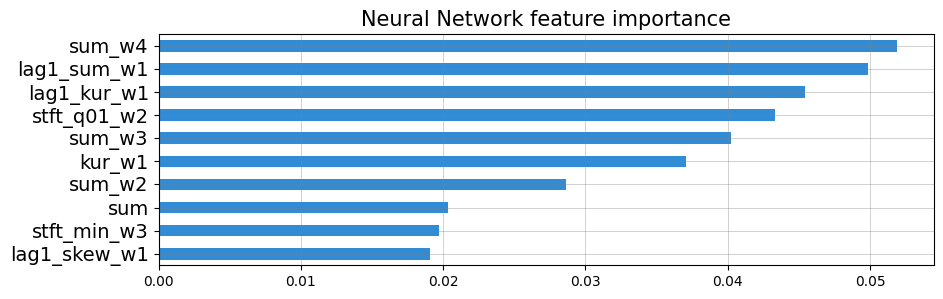

In [105]:
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.set_title("Neural Network feature importance", fontsize=15)
ax1.grid(True, linewidth=0.5, linestyle='-', color='gray', alpha=0.5)
plots1.set_size_inches(10, 3)
plots1

## Feature Importance of RandomForest

In [91]:
interpreter_rf = Interpretation(
        training_data = X_train, training_labels = y_train, feature_names = feature_names
    )
pyint_model_rf = InMemoryModel(
            clf.predict_proba,
            examples = X_train,
            target_names = target_name,
            unique_values = np.unique(y_train).tolist(),
            feature_names = feature_names,
        )

2023-07-09 11:51:32,991 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2023-07-09 11:51:37,887 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[242/242] features ████████████████████ Time elapsed: 172 seconds

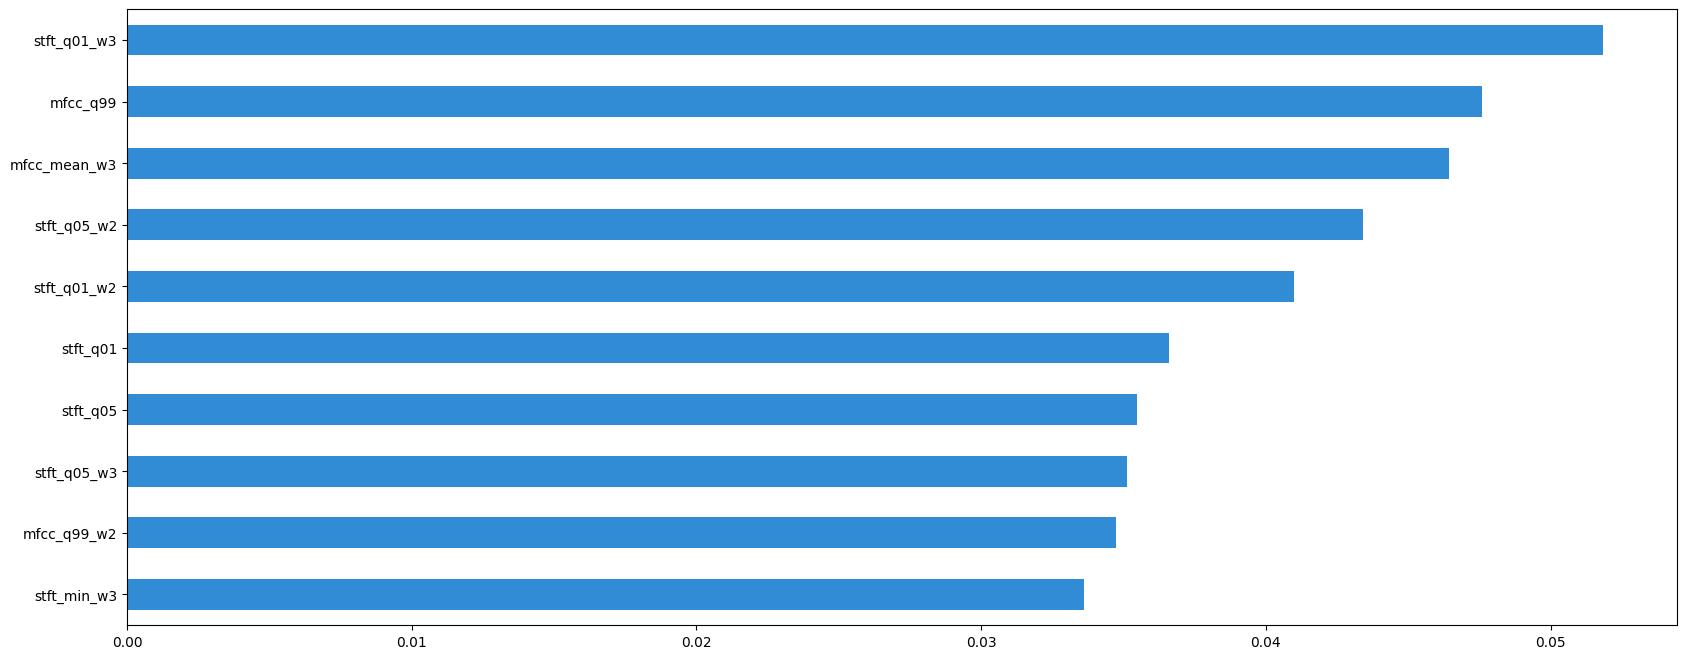

In [106]:
plots2, ax2 = interpreter_rf.feature_importance.plot_feature_importance(pyint_model_rf, ascending=True, progressbar=True,
                                n_jobs=-1, n_features=10, method='model-scoring')

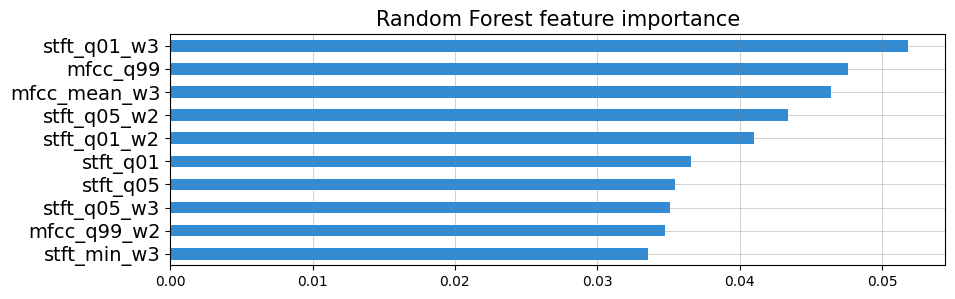

In [107]:
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=10)
ax2.set_title("Random Forest feature importance", fontsize=15)
ax2.grid(True, linewidth=0.5, linestyle='-', color='gray', alpha=0.5)
plots2.set_size_inches(10, 3)
plots2